**Import Library**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

rows, cols = rules.shape
print(f"Jumlah baris : {rows}")
print(f"Jumlah kolom : {cols} (antecedents, consequents, support, confidence, lift)")

Jumlah baris : 48
Jumlah kolom : 14 (antecedents, consequents, support, confidence, lift)


**Input OUTPUT MODEL FINAL**

In [13]:
rules = pd.read_csv("rules_fp_growth_all.csv")
rules.to_csv("rules_fp_growth_all_output.csv", index=False)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'BERAS MEDIUM_MAHAL'}),0.282953,0.317146,0.274529,0.970228,3.059249,1.0,0.184792,22.935871,0.938743,0.843227,0.956400,0.917926
1,"frozenset({'BERAS PREMIUM_MAHAL', 'GABAH KERIN...",frozenset({'BERAS MEDIUM_MAHAL'}),0.289891,0.317146,0.280476,0.967521,3.050716,1.0,0.188538,21.024725,0.946627,0.858877,0.952437,0.925948
2,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'GABAH KERING GILING_MAHAL'}),0.282953,0.316650,0.273043,0.964974,3.047444,1.0,0.183445,19.509638,0.936977,0.836115,0.948743,0.913629
3,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'GABAH KERING GILING_MAHAL'}),0.286422,0.316650,0.275520,0.961938,3.037857,1.0,0.184825,17.953464,0.940080,0.841150,0.944300,0.916024
4,"frozenset({'BERAS MEDIUM_MAHAL', 'BERAS PREMIU...",frozenset({'GABAH KERING GILING_MAHAL'}),0.293360,0.316650,0.280476,0.956081,3.019361,1.0,0.187583,15.559350,0.946456,0.851128,0.935730,0.920920


**TABEL RINGKAS EVALUASI MODEL**

In [6]:
summary_model = pd.DataFrame({
    "Metrik": [
        "Jumlah Transaksi",
        "Frequent Itemsets",
        "Jumlah Rules Final"
    ],
    "Nilai": [
        2018,
        63,
        len(rules)
    ]
})


summary_model.to_csv("Tabel Evaluasi Model.csv", index=False)

summary_model

,Metrik,Nilai
0,Jumlah Transaksi,2018
1,Frequent Itemsets,63
2,Jumlah Rules Final,48


**TABEL EVALUASI UTAMA (TOP RULES)**

In [7]:
top_rules = rules.sort_values("lift", ascending=False).head(10)
top_rules.to_csv("Top_10_Rules.csv", index=False)
top_rules[[
    "antecedents",
    "consequents",
    "support",
    "confidence",
    "lift"
]]


,antecedents,consequents,support,confidence,lift
0,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'BERAS MEDIUM_MAHAL'}),0.274529,0.970228,3.059249
1,"frozenset({'BERAS PREMIUM_MAHAL', 'GABAH KERIN...",frozenset({'BERAS MEDIUM_MAHAL'}),0.280476,0.967521,3.050716
2,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'GABAH KERING GILING_MAHAL'}),0.273043,0.964974,3.047444
3,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'GABAH KERING GILING_MAHAL'}),0.275520,0.961938,3.037857
4,"frozenset({'BERAS MEDIUM_MAHAL', 'BERAS PREMIU...",frozenset({'GABAH KERING GILING_MAHAL'}),0.280476,0.956081,3.019361
5,"frozenset({'BERAS MEDIUM_MAHAL', 'GABAH KERING...",frozenset({'BERAS PREMIUM_MAHAL'}),0.280476,0.962585,3.011623
6,"frozenset({'GABAH KERING PANEN_MAHAL', 'BERAS ...",frozenset({'BERAS PREMIUM_MAHAL'}),0.274529,0.958478,2.998771
7,"frozenset({'BERAS MEDIUM_MAHAL', 'GABAH KERING...",frozenset({'GABAH KERING PANEN_MAHAL'}),0.275520,0.945578,2.986192
8,"frozenset({'BERAS PREMIUM_MAHAL', 'GABAH KERIN...",frozenset({'GABAH KERING PANEN_MAHAL'}),0.273043,0.941880,2.974514
9,"frozenset({'GABAH KERING PANEN_MAHAL', 'GABAH ...",frozenset({'BERAS MEDIUM_MAHAL'}),0.275520,0.942373,2.971419


**GRAFIK 1: DISTRIBUSI SUPPORT**

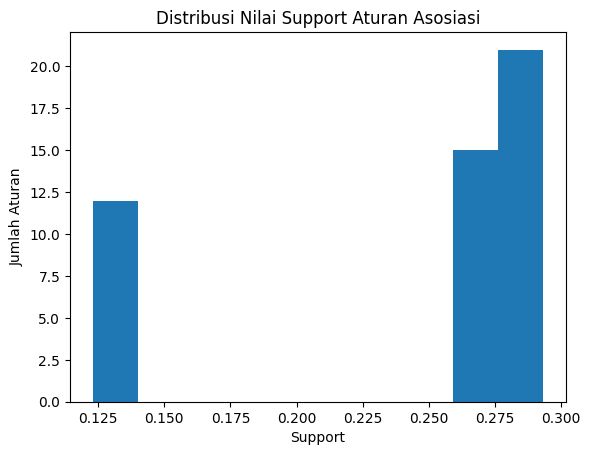

INTERPRETASI SUPPORT:
Mayoritas aturan memiliki nilai support menengah, menunjukkan pola harga mahal yang cukup sering terjadi. 


In [8]:
plt.figure()
plt.hist(rules["support"], bins=10)
plt.xlabel("Support")
plt.ylabel("Jumlah Aturan")
plt.title("Distribusi Nilai Support Aturan Asosiasi")
plt.savefig("grafik_distribusi_support.png", dpi=300, bbox_inches="tight")
plt.show()

print("INTERPRETASI SUPPORT:")
print(
    "Mayoritas aturan memiliki nilai support menengah, menunjukkan pola harga mahal yang cukup sering terjadi. "
)



**GRAFIK : CONFIDENCE vs LIFT**

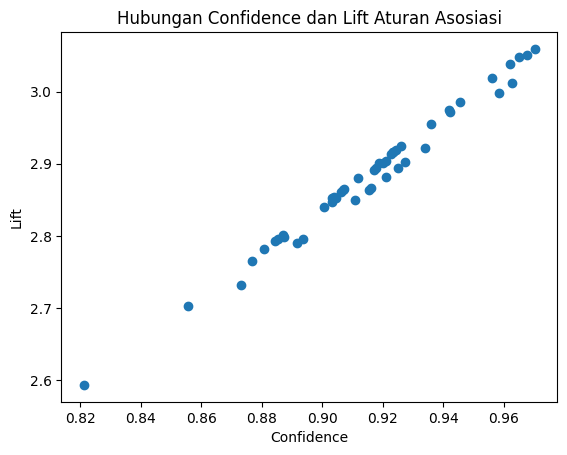

INTERPRETASI CONFIDENCE & LIFT:
Aturan dengan confidence tinggi dan lift di atas 1 menunjukkan keterkaitan kuat antar komoditas. 


In [9]:
plt.figure()
plt.scatter(rules["confidence"], rules["lift"])
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Hubungan Confidence dan Lift Aturan Asosiasi")
plt.savefig("hubungan_confidence_vs_lift.png", dpi=300, bbox_inches="tight")
plt.show()

print("INTERPRETASI CONFIDENCE & LIFT:")
print(
    "Aturan dengan confidence tinggi dan lift di atas 1 menunjukkan keterkaitan kuat antar komoditas. "
)

**GRAFIK 3: TOP 10 LIFT**

In [10]:
top_rules["rule"] = (
    top_rules["antecedents"].apply(lambda x: ", ".join(eval(x))) +
    " → " +
    top_rules["consequents"].apply(lambda x: ", ".join(eval(x)))
)


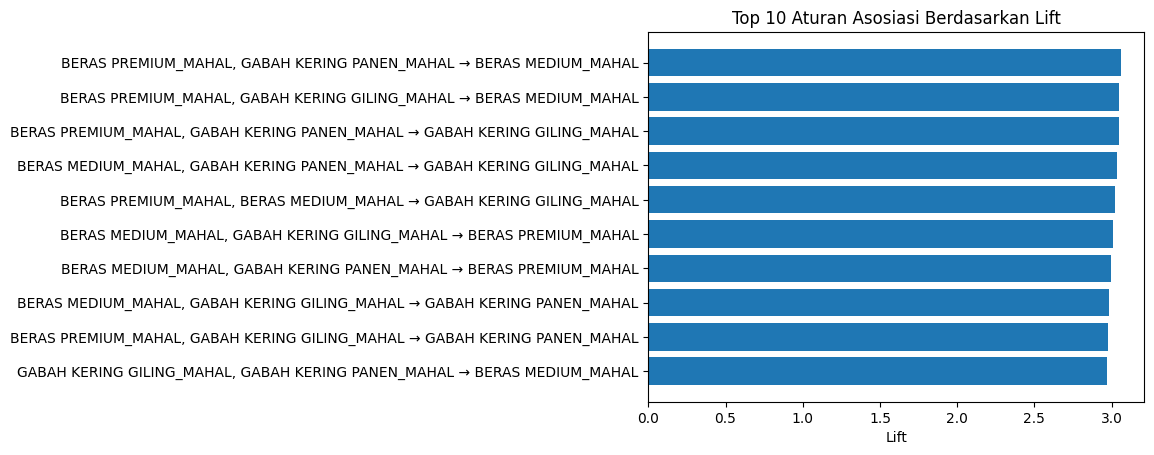

In [11]:
plt.figure()
plt.barh(top_rules["rule"], top_rules["lift"])
plt.xlabel("Lift")
plt.title("Top 10 Aturan Asosiasi Berdasarkan Lift")
plt.gca().invert_yaxis()

plt.savefig("grafik_top10_lift.png", dpi=300, bbox_inches="tight")
plt.show()


**INTERPRETASI**

In [12]:
print("Insight utama:")
print("- Aturan dengan lift > 1 menunjukkan hubungan positif antar komoditas.")
print("- Komoditas gabah dan beras memiliki keterkaitan harga yang sangat kuat.")
print("- Kenaikan harga bahan baku berpengaruh langsung pada produk turunan.")

Insight utama:
- Aturan dengan lift > 1 menunjukkan hubungan positif antar komoditas.
- Komoditas gabah dan beras memiliki keterkaitan harga yang sangat kuat.
- Kenaikan harga bahan baku berpengaruh langsung pada produk turunan.
